In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cosmology import Y_x_eq, Y_x_eq_massive # equilibrium comoving density of x particles
from tqdm import tqdm # progress bar
import fBE_solver as fBE
from scipy.special import kn # Bessel function
import re

Defining the physics for the tau decay to muon and axion and creating the corresponding process (and collision term). Everything here can be arbitrary and is provided by the user in their code in any manner 

In [2]:
# The mass of the mother particle (MP)
m1 = 57  # GeV (scalar singlet)
print(4*m1**2)
# Number of SSDM dofs
g_m1 = 1.0

lambda_S =  0.0025 # compare with Figure 1 of 1706.07433 or DRAKE settings for SSDM


12996


Creating an instance of the Model class for the axion and an instance of the particular process (decay)

In [3]:
SSDM = fBE.Model(m = m1, g_dof = 1, p_type = 'b')

# Creating an instance of the Annihilation class, integration and tabulation may take a minute or so
SSDM_annihilation = fBE.Annihilation(m1, g_m1, lambda_S)

100%|██████████| 100/100 [01:27<00:00,  1.14it/s]


Defining the grid of x and q values and assigning it to the model

In [4]:
N_x = 100 # number of x points
N_q = 200 # number of q points
xstart = 10.0  # starting x value
xfin = 200.0 # final x value

qin = 0.0001 # starting q value
qend = 20. # final q value

# Creating vectors of linearly distributed values of x and q
x_lin = np.linspace(xstart,xfin,N_x)
q_lin = np.linspace(qin,qend,N_q)

# Assigning the grid (of x and q) to the model
SSDM.changeGrid(x_lin, q_lin)

100 100


Text(0, 0.5, '$\\sigma v$')

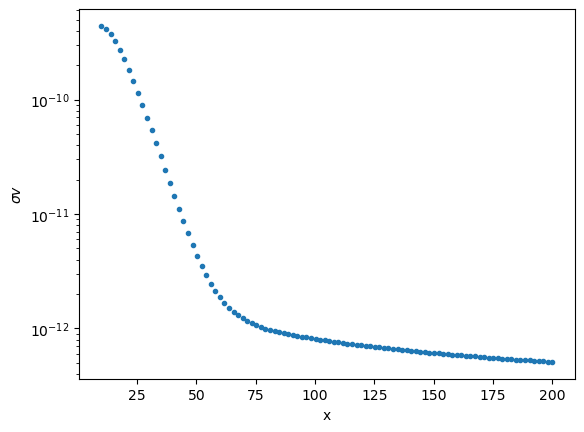

In [5]:
x = SSDM.getX() # returns a vector of x values
Y_list = np.linspace(1e-12, 1e-3, 100) # list of Y values
print(len(x), len(Y_list))
plt.semilogy(x, SSDM_annihilation.sigma_v(x), '.')
plt.xlabel('x')
plt.ylabel(r'$\sigma v$')

In [6]:
x = SSDM.getX()
Yode = SSDM.solve_nBE(x, SSDM_annihilation.rate, 2.5e-6)

2024-07-26 10:49:03,333 - Starting solve_nBE...
2024-07-26 10:49:03,408 - solve_nBE completed in 0.07 seconds


In [7]:
x = SSDM.getX()
print(len(x), len(Yode))
#print(Yode)

100 100


In [8]:
import ast
with open('DRAKE_SSDM.dat', 'r') as file:
    DRAKE_data = ast.literal_eval(file.read())

DRAKE_data = np.array(DRAKE_data)
x_DRAKE, y_DRAKE = DRAKE_data.T

2.5262381185849724e-06


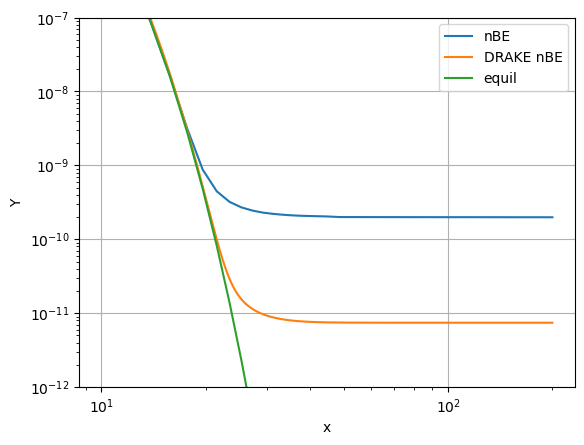

In [10]:
x = SSDM.getX()
plt.figure
plt.loglog(x,Yode, label = 'nBE')
plt.loglog(x_DRAKE, y_DRAKE, label = 'DRAKE nBE')
T = [SSDM_annihilation._m1/x_val for x_val in x]
Y_x_eq_massive_list = [Y_x_eq_massive(T_val, m1) for T_val in T]
print(Y_x_eq_massive_list[0])
plt.loglog(x, Y_x_eq_massive_list, label = 'equil')
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("Y")
plt.ylim(1e-12, 1e-7)
plt.show()